In [4]:
%reload_ext asymptote

b''


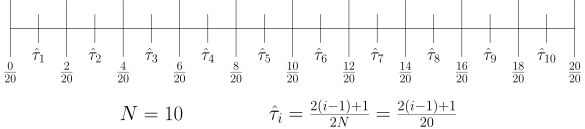

In [5]:
%%asy -f svg -r quantiles

unitsize(1cm);
int N = 10;
real length = 20;

real[] pos;

draw((0,0)--(length,0));

for (int i = 0; i <= 2*N; ++i)
    pos[i] = i*length / (2*N);
    
for (int i = 0; i <= 2*N; i+=2) {
    draw((pos[i],-1)--(pos[i],1));
    string text = "$\frac{" + (string)i + "}{" + string(2*N) + "}$";
    label(text, (pos[i],-1), S, fontsize(18pt));
}

for (int i = 1; i <= N; ++i) {
    real p = pos[2*(i-1) + 1];
    draw((p,-0.5)--(p,0.5));
    string text = "$\hat\tau_{" + (string)i + "}$";
    label(text, (p,-0.5), S, fontsize(18pt));
}

pen fs = fontsize(20pt);
label("$N=" + (string)N + "$", (length*2/8, -3), fs);
label("$\hat\tau_i = \frac{2(i-1)+1}{2N} = \frac{2(i-1)+1}{20}$", (length*5/8, -3), fs);

b''


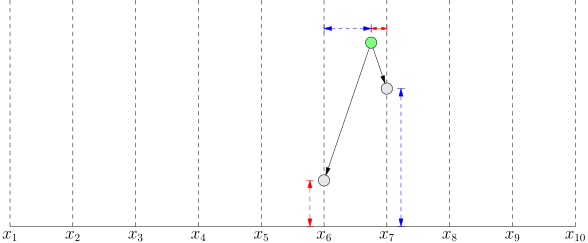

In [6]:
%%asy -f svg -r split

unitsize(1cm);
int N = 10;
real length = 20;
real wall_height = 8;

draw((0,0)--(length,0));

real delta = length / (N-1);

for (int i = 0; i < N; ++i) {
    real p = i*delta;
    draw((p, 0)--(p, wall_height), dashed);
    label("$x_{" + (string)(i+1) + "}$", (p, 0), S, fontsize(16));
}

real prop = 3 / 4;
real height = 6.5;
real radius = 0.2;

int l = floor(N / 2);          // left atom
int r = l + 1;                 // right atom
pair l_pos = (l*delta, (1-prop)*height);
pair r_pos = (r*delta, prop*height);

pair atom_pos = (l_pos.x + prop*delta, height);

filldraw(circle(atom_pos, radius), lightgreen);
filldraw(circle(l_pos, radius), lightgrey);
filldraw(circle(r_pos, radius), lightgrey);

margin margin = TrueMargin(radius*cm, radius*cm);
draw(atom_pos -- l_pos, Arrow, margin);
draw(atom_pos -- r_pos, Arrow, margin);

real y = atom_pos.y + 0.5;
draw((l_pos.x, y) -- (atom_pos.x, y), dashed + blue, Arrows, Bars);
draw((atom_pos.x, y) -- (r_pos.x, y), dashed + red, Arrows, Bars);

real x = l_pos.x - 0.5;
draw((x, 0) -- (x, l_pos.y), dashed + red, Arrows, Bars);
real x = r_pos.x + 0.5;
draw((x, 0) -- (x, r_pos.y), dashed + blue, Arrows, Bars);


b''


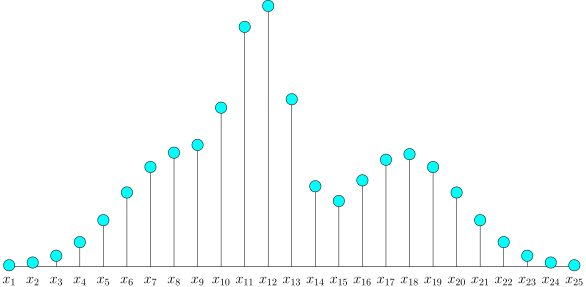

In [7]:
%%asy -f svg -r discrete

unitsize(1cm);
int N = 25;
real length = 20;
real wall_height = 8;

draw((0,0)--(length,0));

real delta = length / (N-1);

real pdf(real x) {
    real[] pis = {1/3, 1/3, 1/3};
    real[] mus = {-3, 0, 5};
    real[] sigmas = {2, 1, 2};
    real sum = 0;
    for (int i = 0; i < 3; ++i)
        sum += pis[i] * exp(-0.5 * ((x-mus[i])/sigmas[i])**2) / (sqrt(2*pi)*sigmas[i]);
    return sum;
}

real radius = 0.2;

for (int i = 0; i < N; ++i) {
    real p = i*delta;
    real x = p - 9;
    draw((p, 0)--(p, 60 * pdf(x)), TrueMargin(0, radius*cm));
    filldraw(circle((p, 60 * pdf(x)), radius), cyan);
    label("$x_{" + (string)(i+1) + "}$", (p, 0), 2.5*S, fontsize(14));
}


b''


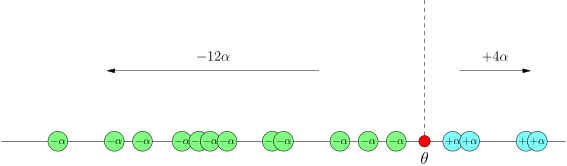

In [9]:
%%asy -f svg -r median

unitsize(1cm);
real length = 20;
real height = 5;

draw((0,0)--(length,0));

real radius = 0.2;

real red_x = length * 6/8;
filldraw(circle((red_x,0), radius), red);
label("$\theta$", (red_x,0), 2*S, fontsize(18));
draw((red_x,0) -- (red_x,height), dashed, TrueMargin(radius*cm, 0));

real[] pos_xs = {0.1, 0.2, 0.25, 0.32, 0.35, 0.37, 0.4, 0.48, 0.5, 0.6, 0.65, 0.7,
                 0.8, 0.83, 0.93, 0.95};

real radius = 0.35;

for (int i = 0; i < pos_xs.length; ++i) {
    real x = pos_xs[i] * length;
    string text;
    pen color;
    if (x < red_x) {
        text = "$-\alpha$";
        color = lightgreen;
    }
    else
    {
        text = "$+\alpha$";
        color = lightcyan;
    }
    filldraw(circle((x,0), radius), color);
    label(text, (x,0), fontsize(11));
}

real samples_prop = 3/4;
real arrow_units = 0.5;

real x = red_x / 2;
real dx = samples_prop / 2 * length * arrow_units;
draw((x-dx, height/2) -- (x+dx, height/2), BeginArrow);
label("$-12\alpha$", (x, height/2 + 0.5), fontsize(14));

x = (red_x + length) / 2;
real dx = (1 - samples_prop) / 2 * length * arrow_units;
draw((x-dx, height/2) -- (x+dx, height/2), EndArrow);
label("$+4\alpha$", (x, height/2 + 0.5), fontsize(14));

b''


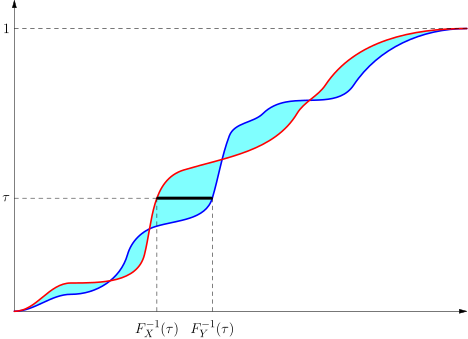

In [10]:
%%asy -f svg -r wasserstein

unitsize(2cm);
real width = 8;
real height = 5.5;

draw((0,0)--(width,0), EndArrow);
draw((0,0)--(0,height), EndArrow);

path p = (0,0){1,0}..(1,0.3){1,0}..{0.2,0.7}(2.0,1)..(2.5,1.5){1,0.3}..{0.3,1}(3.5,2)..{0.3,0.8}(3.8,3.1)..
    (4.4,3.5){1,1}..(4.8,3.7)..(6,4){1,1.5}..{1,0}(8,5);
path q = (0,0){1,0}..(1,0.5){1,0}..{0.2,0.8}(2.3,1)..(3,2.5){1,0.3}..{0.3,0.5}(5,3.5)..
    (5.5,4){1,1.5}..{1,0}(8,5);
fill(p..reverse(q)..cycle, evenodd+lightcyan);
draw(p, blue+linewidth(1.6));
draw(q, red+linewidth(1.6));

real one_y = 5;
draw((0,one_y)--(8,one_y), dashed);
label("$1$", (0,one_y), W, fontsize(15));

real y = 2;
path seg = (0,y)--(8,y);
pair l_int = intersectionpoint(seg, q);
pair r_int = intersectionpoint(seg, p);
draw(l_int--r_int, linewidth(3), TrueMargin(1,1));

draw((0,l_int.y)--l_int, dashed);
label("$\tau$", (0,l_int.y), W, fontsize(15));

draw((l_int.x,y)--(l_int.x,0), dashed);
label("$F_X^{-1}(\tau)$", (l_int.x,0), 2*S, fontsize(15));

draw((r_int.x,y)--(r_int.x,0), dashed);
label("$F_Y^{-1}(\tau)$", (r_int.x,0), 2*S, fontsize(15));

b''


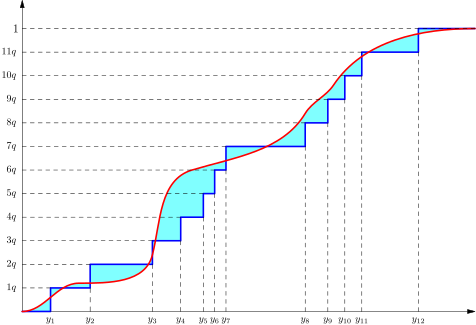

In [11]:
%%asy -f svg -r wasserstein_step

unitsize(2cm);
real width = 8;
real height = 5.5;
real one_y = 5;

draw((0,0)--(width,0), EndArrow);
draw((0,0)--(0,height), EndArrow);

real[] xs = {0.5, 1.2, 2.3, 2.8, 3.2, 3.4, 3.6, 5, 5.4, 5.7, 6, 7};
int N = xs.length;
real step = one_y / N;

path p = (0,0);
for (int i = 0; i < N; ++i)
    p = p -- (xs[i], i*step) -- (xs[i], (i+1)*step);          // adds a step
p = p -- (width, one_y);

path q = (0,0){1,0}..(1,0.5){1,0}..{0.2,0.8}(2.3,1)..(3,2.5){1,0.3}..{0.3,0.5}(5,3.5)..
    (5.5,4){1,1.5}..{1,0}(8,5);
fill(p..reverse(q)..cycle, evenodd+lightcyan);
draw(p, blue+linewidth(1.6));
draw(q, red+linewidth(1.6));

draw((0,one_y)--(8,one_y), dashed);
label("$1$", (0,one_y), W);

for (int i = 0; i < N; ++i) {
    draw((xs[i],0)--(xs[i],(i*step)), dashed);
    label("$y_{" + (string)(i+1) + "}$", xs[i], 2*S, fontsize(10));
}

for (int i = 1; i < N; ++i) {
    draw((0,i*step)--(xs[i-1],i*step), dashed);
    label("$" + (string)i + "q$", (0,i*step), 2*W, fontsize(10));
}


b''


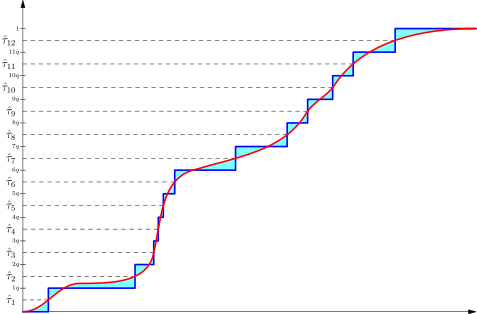

In [12]:
%%asy -f svg -r wasserstein_optim

unitsize(2cm);
real width = 8;
real height = 5.5;
real one_y = 5;

draw((0,0)--(width,0), EndArrow);
draw((0,0)--(0,height), EndArrow);

int N = 12;

real step = one_y / N;
real tick = 0.05;
pen small_fs = fontsize(6);

for (int i = 1; i < N; ++i) {
    real y = i*step;
    draw((-tick, y)--(tick, y));
    label("$" + (string)i + "q$", (0,y), 2*W, small_fs);
}
draw((-tick,one_y)--(tick,one_y));
label("$1$", (0,one_y), 2*W, small_fs);

path q = (0,0){1,0}..(1,0.5){1,0}..{0.2,0.8}(2.3,1)..(3,2.5){1,0.3}..{0.3,0.5}(5,3.5)..
    (5.5,4){1,1.5}..{1,0}(8,5);

real[] xs;
for (int i = 0; i < N; ++i) {
    real y = one_y * (2*i + 1) / (2*N);
    xs[i] = intersectionpoint((0,y)--(width,y), q).x;
    draw((0,y)--(xs[i],y), dashed);
    label("$\hat\tau_{" + string(i+1) + "}$", (0,y), 2*W);
}

path p = (0,0);
for (int i = 0; i < N; ++i)
    p = p -- (xs[i], i*step) -- (xs[i], (i+1)*step);          // adds a step
p = p -- (width, one_y);

fill(p..reverse(q)..cycle, evenodd+lightcyan);
draw(p, blue+linewidth(1.6));
draw(q, red+linewidth(1.6));


b''


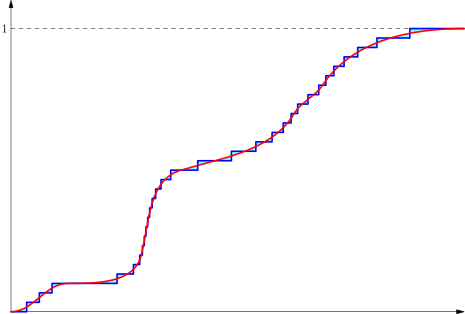

In [13]:
%%asy -f svg -r wasserstein_optim_30

unitsize(2cm);
real width = 8;
real height = 5.5;
real one_y = 5;

draw((0,0)--(width,0), EndArrow);
draw((0,0)--(0,height), EndArrow);

int N = 30;

real step = one_y / N;
real tick = 0.05;
pen small_fs = fontsize(6);

draw((0,one_y)--(8,one_y), dashed);
label("$1$", (0,one_y), W);

path q = (0,0){1,0}..(1,0.5){1,0}..{0.2,0.8}(2.3,1)..(3,2.5){1,0.3}..{0.3,0.5}(5,3.5)..
    (5.5,4){1,1.5}..{1,0}(8,5);

real[] xs;
for (int i = 0; i < N; ++i) {
    real y = one_y * (2*i + 1) / (2*N);
    xs[i] = intersectionpoint((0,y)--(width,y), q).x;
}

path p = (0,0);
for (int i = 0; i < N; ++i)
    p = p -- (xs[i], i*step) -- (xs[i], (i+1)*step);          // adds a step
p = p -- (width, one_y);

fill(p..reverse(q)..cycle, evenodd+lightcyan);
draw(p, blue+linewidth(1.6));
draw(q, red+linewidth(1.6));


b''


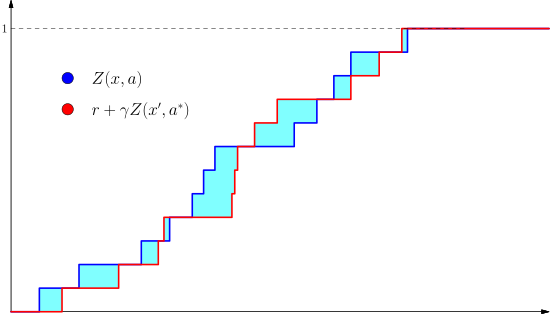

In [20]:
%%asy -f svg -r wasserstein_both

unitsize(2cm);

real width = 9.5;
real height = 5.5;

int N = 60;

real one_y = 5;
real sample_radius = 0.05;

path get_step_func(real[] xs) {
    draw((0,0)--(width,0), EndArrow);
    draw((0,0)--(0,height), EndArrow);

    int N = xs.length;
    real step = one_y / N;

    path p = (0,0);
    for (int i = 0; i < N; ++i)
        p = p -- (xs[i], i*step) -- (xs[i], (i+1)*step);          // adds a step
    p = p -- (width, one_y);

    return p;
}

void draw_samples(real[] xs, pen my_pen=black) {
    for (int i = 0; i < xs.length; ++i)
        fill(circle((xs[i],-0.25),sample_radius), my_pen);
}

real[] xs = {0.5, 1.2, 2.3, 2.8, 3.2, 3.4, 3.6, 5, 5.4, 5.7, 6, 7};
path p = get_step_func(xs);
real[] ys = {0.9, 1.9, 2.6, 2.7, 3.9, 3.95, 4, 4.3, 4.7, 6, 6.5, 6.9};
path q = get_step_func(ys);

fill(p..reverse(q)..cycle, evenodd+lightcyan);
draw(p, blue+linewidth(1.6));
draw(q, red+linewidth(1.6));

draw((0,one_y)--(8,one_y), dashed);
label("$1$", (0,one_y), W);

real radius = 0.1;
pen fs = fontsize(16);

real y = height * 3/4;
filldraw(circle((1,y), radius), blue);
label("$Z(x,a)$", (1,y-radius/4), 5*E, fs);

y -= height * 1/10;
filldraw(circle((1,y), radius), red);
label("$r+\gamma Z(x',a^*)$", (1,y-radius/4), 5*E, fs);
